In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [2]:


# Load the DataFrame from the CSV file
df = pd.read_csv('Data/output/df_cleaned.csv')



In [3]:
df.columns

Index(['job_title_short', 'job_title', 'job_location', 'job_via',
       'job_schedule_type', 'job_work_from_home', 'search_location',
       'job_posted_date', 'job_no_degree_mention', 'job_health_insurance',
       'job_country', 'salary_year_avg', 'company_name', 'job_skills',
       'job_type_skills', 'num_jobs', 'latitude', 'longitude'],
      dtype='object')

C:\Users\reetu\AppData\Local\Temp\ipykernel_3124\3368265799.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_title_counts.index, y=job_title_counts.values, palette='husl')  # Change palette here


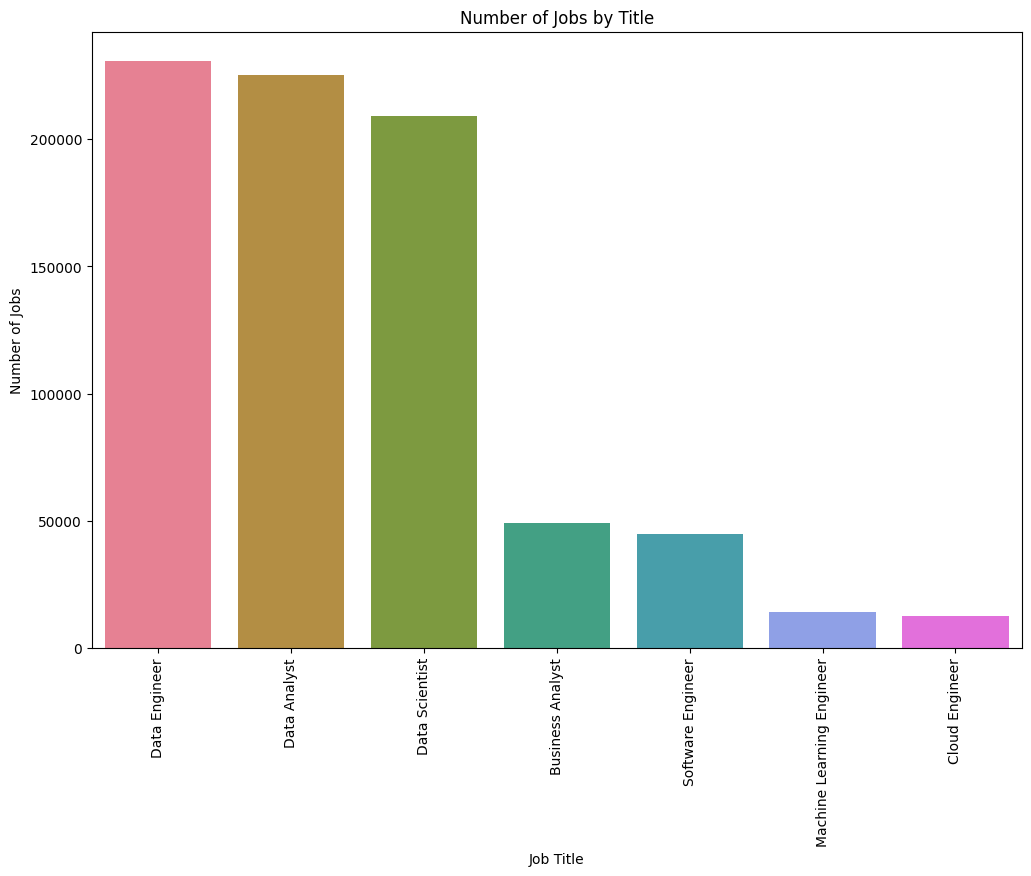

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each job title
job_title_counts = df['job_title_short'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=job_title_counts.index, y=job_title_counts.values, palette='husl')  # Change palette here
plt.xticks(rotation=90)
plt.xlabel('Job Title')
plt.ylabel('Number of Jobs')
plt.title('Number of Jobs by Title')
plt.show()


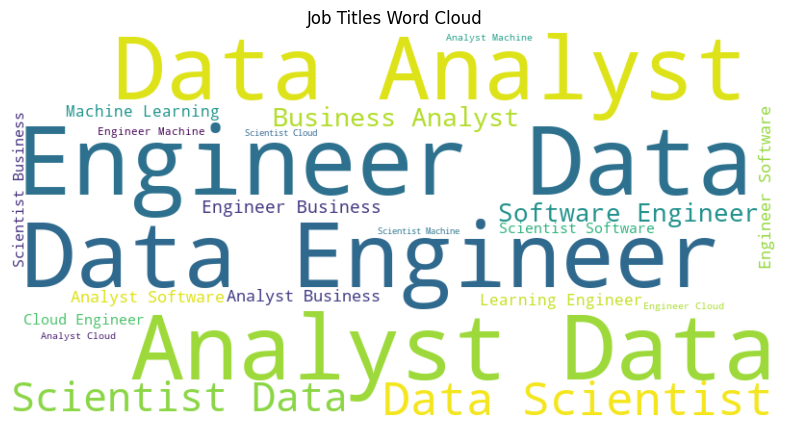

In [5]:
from wordcloud import WordCloud

# Concatenate all job titles into a single string
text = ' '.join(df['job_title_short'].dropna())

# Generate and plot the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Job Titles Word Cloud')
plt.show()


In [6]:
import folium
from folium.plugins import HeatMap

# Prepare data for heatmap
heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]

# Initialize map
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=10)

# Add heatmap layer
HeatMap(heat_data).add_to(m)

# Save heatmap to an HTML file
m.save('job_locations_heatmap.html')


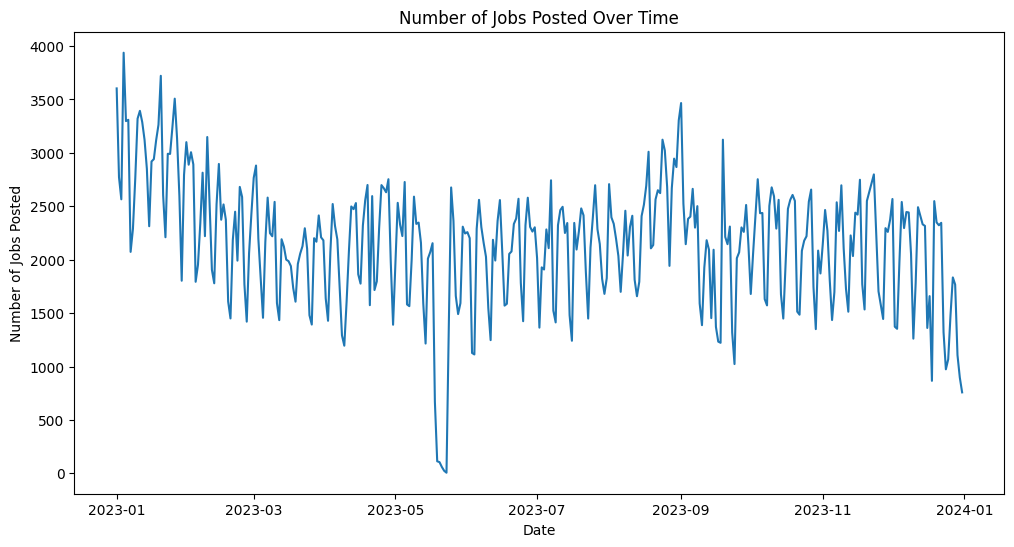

In [7]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
jobs_per_day = df.groupby(df['job_posted_date'].dt.date).size()

plt.figure(figsize=(12, 6))
jobs_per_day.plot()
plt.xlabel('Date')
plt.ylabel('Number of Jobs Posted')
plt.title('Number of Jobs Posted Over Time')
plt.show()


In [8]:
df.job_title_short.unique()

array(['Data Engineer', 'Data Analyst', 'Business Analyst',
       'Data Scientist', 'Machine Learning Engineer', 'Cloud Engineer',
       'Software Engineer'], dtype=object)

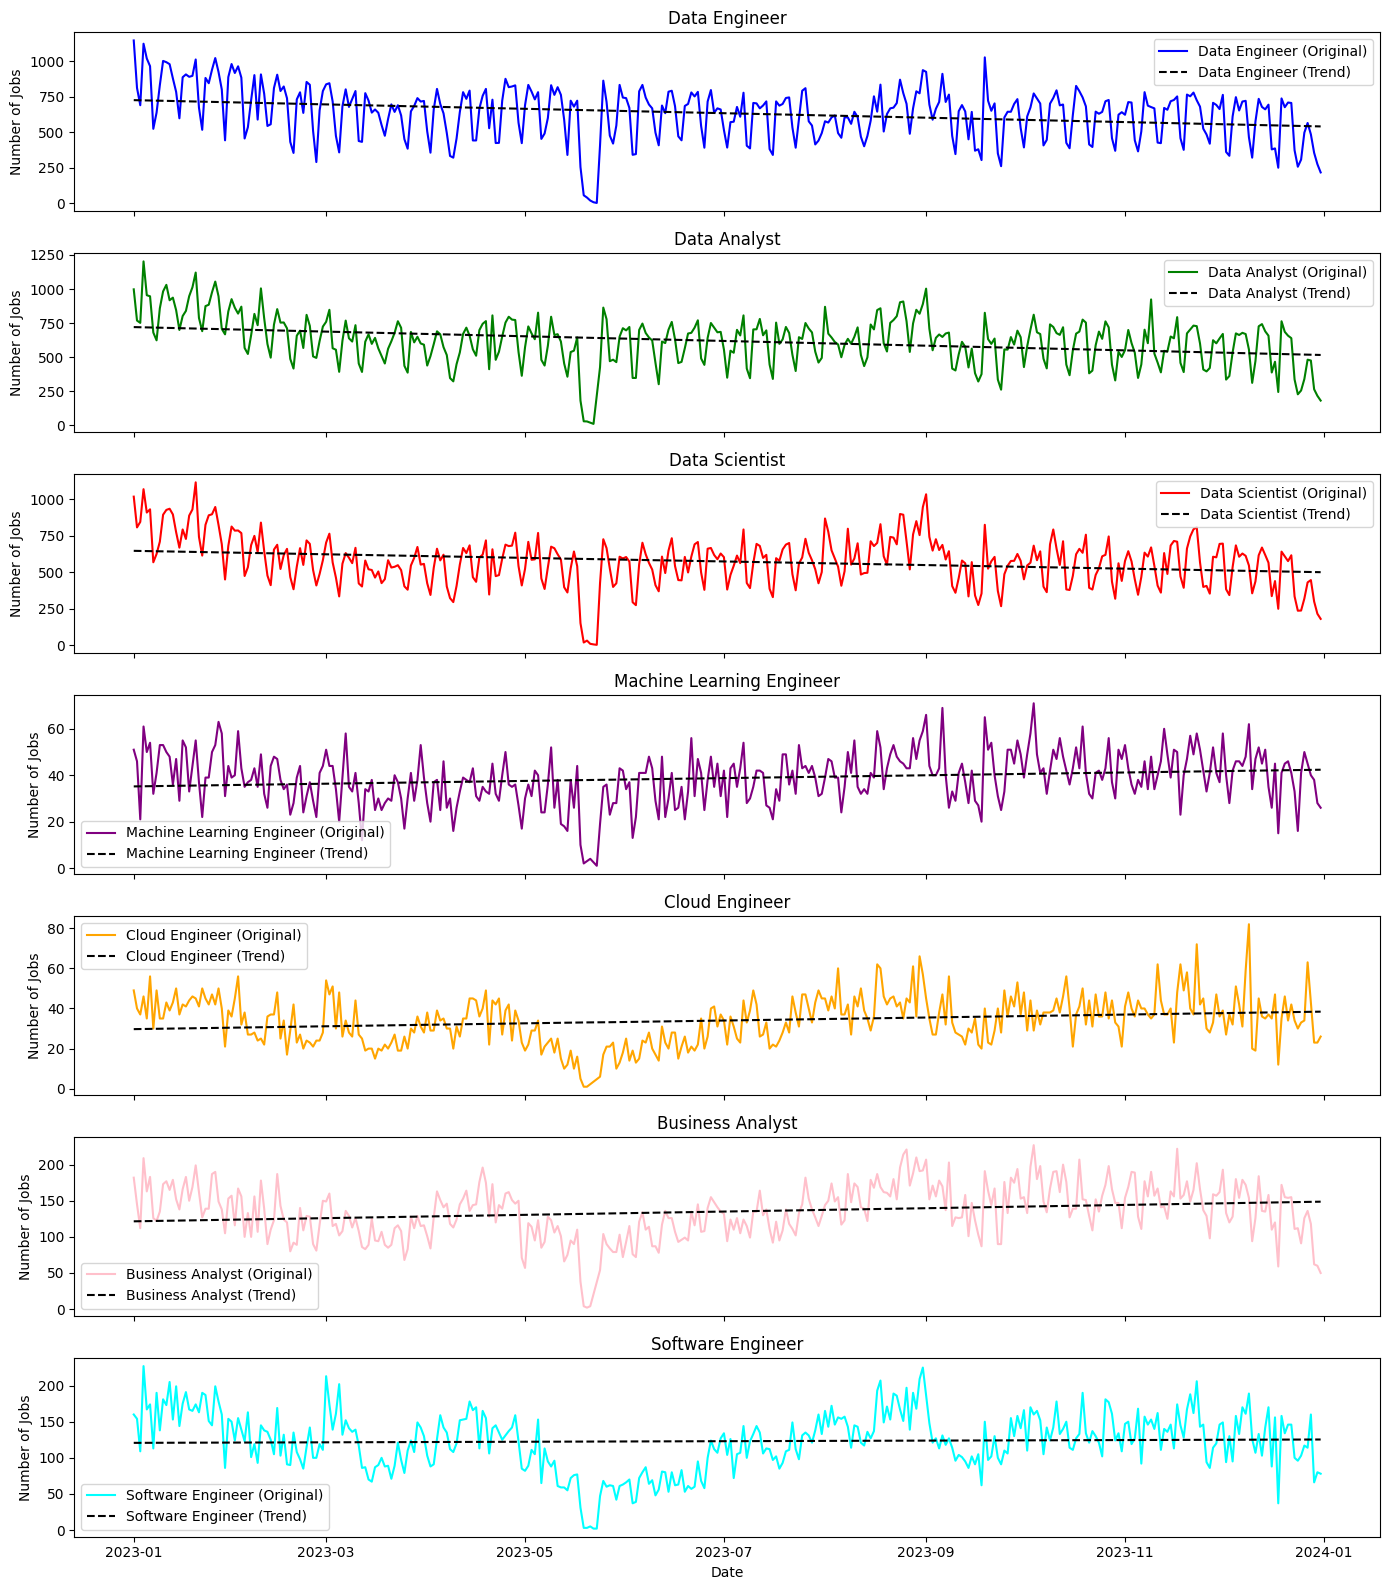

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats



# Convert 'job_posted_date' to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Define a color palette for the job titles
job_title_colors = {
    'Data Engineer': 'blue',
    'Data Analyst': 'green',
    'Data Scientist': 'red',
    'Machine Learning Engineer': 'purple',
    'Cloud Engineer': 'orange',
    'Business Analyst': 'pink',
    'Software Engineer': 'cyan'
}

# Create subplots - one for each job title
fig, axes = plt.subplots(nrows=len(job_title_colors), ncols=1, sharex=True, figsize=(14, 16))

# Flatten axes for easy iteration
axes = axes.flatten()

# Iterate over each job title and corresponding axis
for i, (job_title, color) in enumerate(job_title_colors.items()):
    # Filter the DataFrame for the current job title
    filtered_df = df[df['job_title_short'] == job_title]
    
    # Group by date and count the number of jobs posted
    jobs_per_day = filtered_df.groupby(filtered_df['job_posted_date'].dt.date).size()
    
    # Plot the original zig-zag data on the corresponding axis
    axes[i].plot(jobs_per_day.index, jobs_per_day.values, 
                 linestyle='-', color=color, label=f'{job_title} (Original)')
    
    # Add a trend line (linear regression)
    x_values = np.arange(len(jobs_per_day))
    y_values = jobs_per_day.values
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
    trend_line = slope * x_values + intercept
    
    # Plot the trend line
    axes[i].plot(jobs_per_day.index, trend_line, 
                 linestyle='--', color='black', label=f'{job_title} (Trend)')
    
    # Set the title and labels
    axes[i].set_title(job_title)
    axes[i].set_ylabel('Number of Jobs')
    axes[i].legend()

# Set common x-axis label
plt.xlabel('Date')

# Adjust layout to make room for titles and labels
plt.tight_layout()

# Show the plot
plt.show()


<Figure size 1200x800 with 0 Axes>

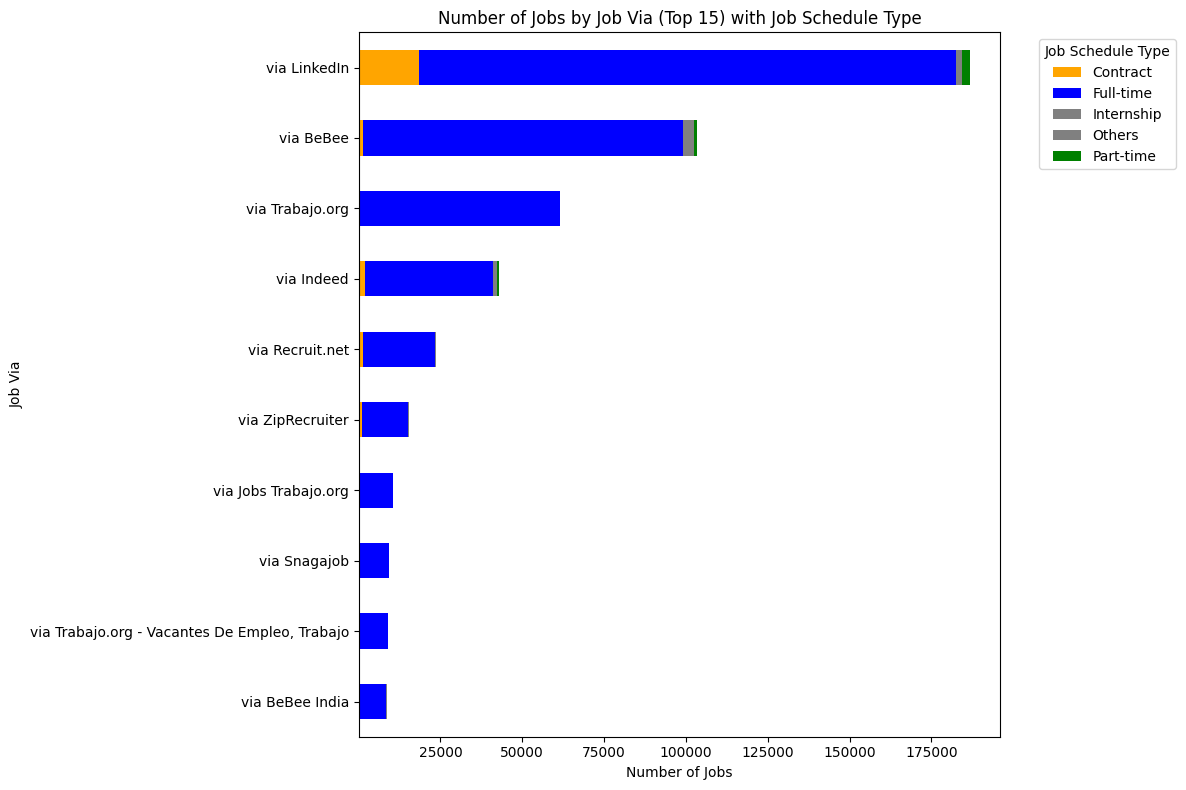

In [70]:
import pandas as pd
import matplotlib.pyplot as plt


# Get value counts for 'job_via' and sort them in descending order
job_via_counts = df['job_via'].value_counts()
sorted_job_via_counts = job_via_counts.sort_values(ascending=False).head(10)

# Filter DataFrame for top 15 job_via and create a color mapping for job_schedule_type
top_15_df = df[df['job_via'].isin(sorted_job_via_counts.index)]
job_schedule_colors = {'Full-time': 'blue', 'Part-time': 'green', 'Contract': 'orange'}

# Create a DataFrame for plotting with job_via and job_schedule_type counts
plot_data = top_15_df.groupby(['job_via', 'job_schedule_type']).size().unstack().fillna(0)
plot_data = plot_data.loc[sorted_job_via_counts.index]

# Plotting
plt.figure(figsize=(12, 8))

# Plot horizontal stacked bar chart
ax = plot_data.plot(kind='barh', stacked=True, color=[job_schedule_colors.get(x, 'grey') for x in plot_data.columns], figsize=(12, 8))

# Reduce space between bars
ax.invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.1)  # Adjust subplot parameters

# Customizing the plot
plt.xlabel('Number of Jobs')
plt.ylabel('Job Via')
plt.title('Number of Jobs by Job Via (Top 15) with Job Schedule Type')
plt.legend(title='Job Schedule Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


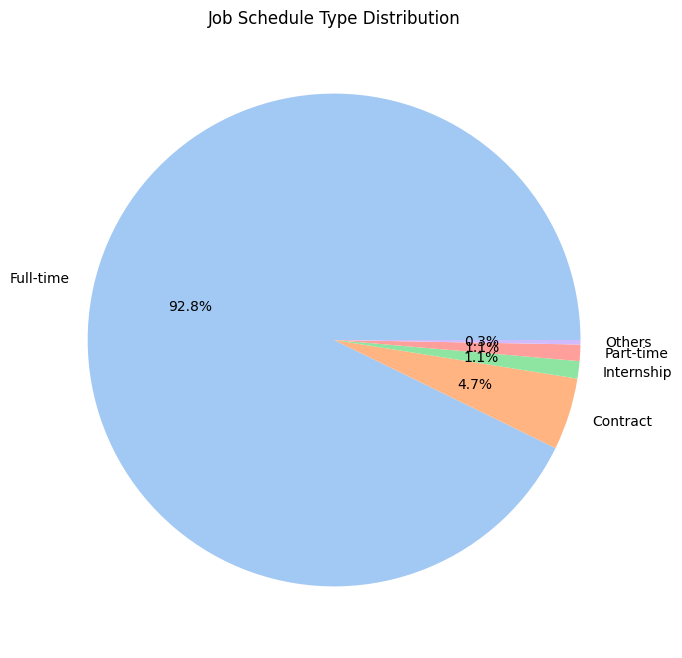

In [11]:
job_schedule_counts = df['job_schedule_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(job_schedule_counts, labels=job_schedule_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Job Schedule Type Distribution')
plt.show()


C:\Users\reetu\AppData\Local\Temp\ipykernel_3124\4283294702.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=company_job_counts.index, y=company_job_counts.values, palette='husl')


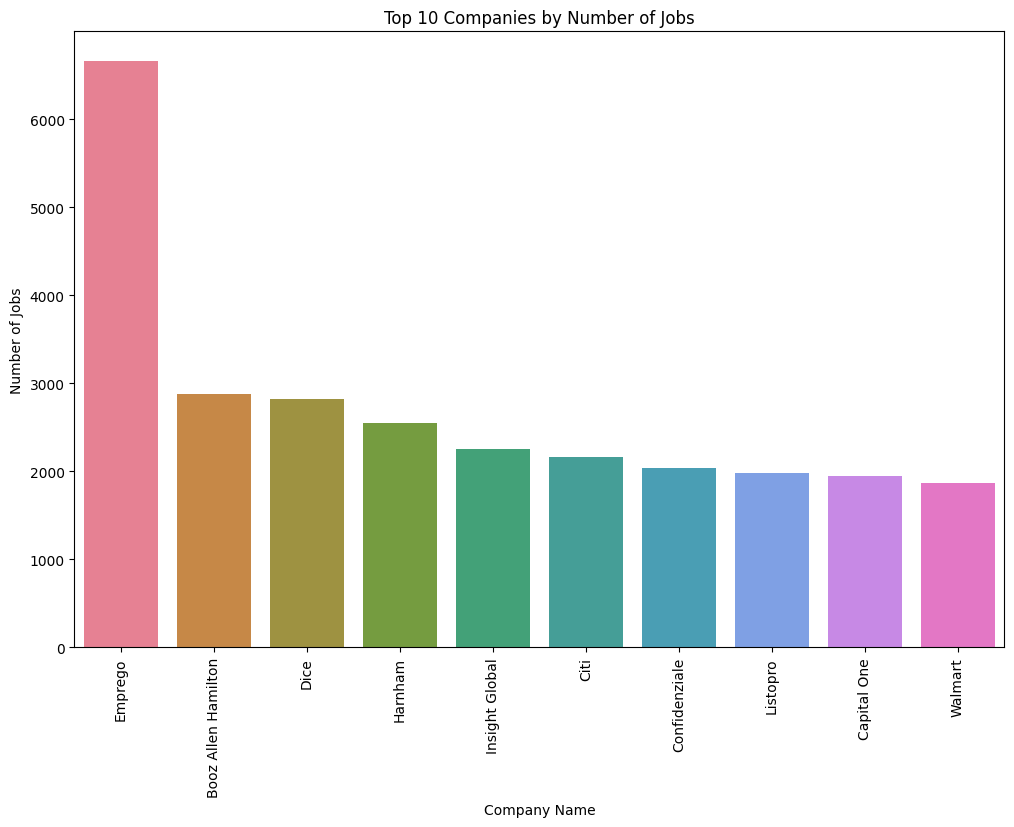

In [12]:
company_job_counts = df['company_name'].value_counts().head(10)  # Top 10 companies

plt.figure(figsize=(12, 8))
sns.barplot(x=company_job_counts.index, y=company_job_counts.values, palette='husl')
plt.xticks(rotation=90)
plt.xlabel('Company Name')
plt.ylabel('Number of Jobs')
plt.title('Top 10 Companies by Number of Jobs')
plt.show()


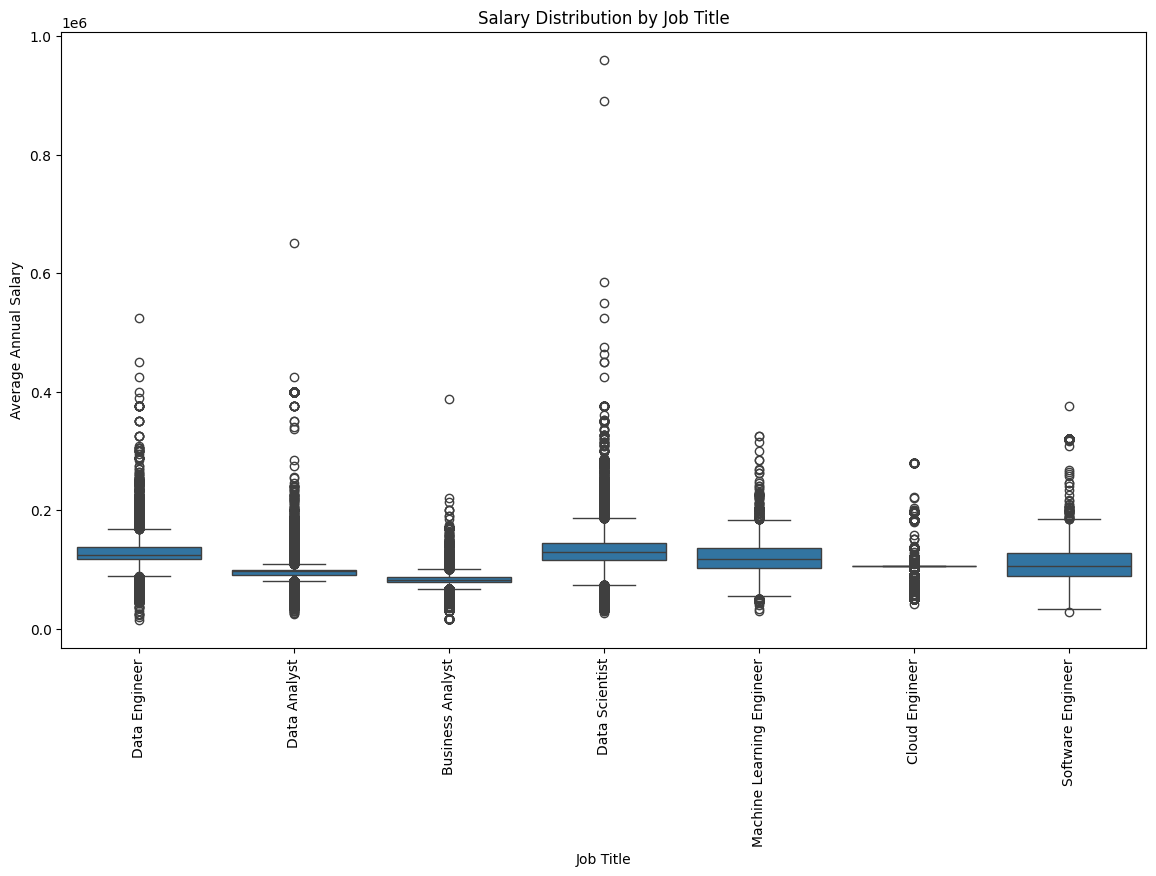

In [13]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='job_title_short', y='salary_year_avg', data=df)
plt.xticks(rotation=90)
plt.xlabel('Job Title')
plt.ylabel('Average Annual Salary')
plt.title('Salary Distribution by Job Title')
plt.show()


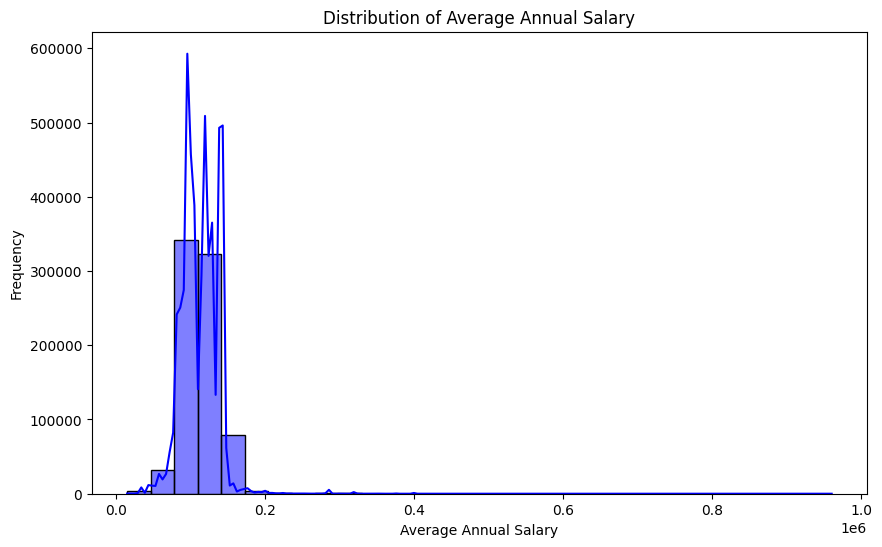

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_year_avg'], bins=30, kde=True, color='blue')
plt.xlabel('Average Annual Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Average Annual Salary')
plt.show()


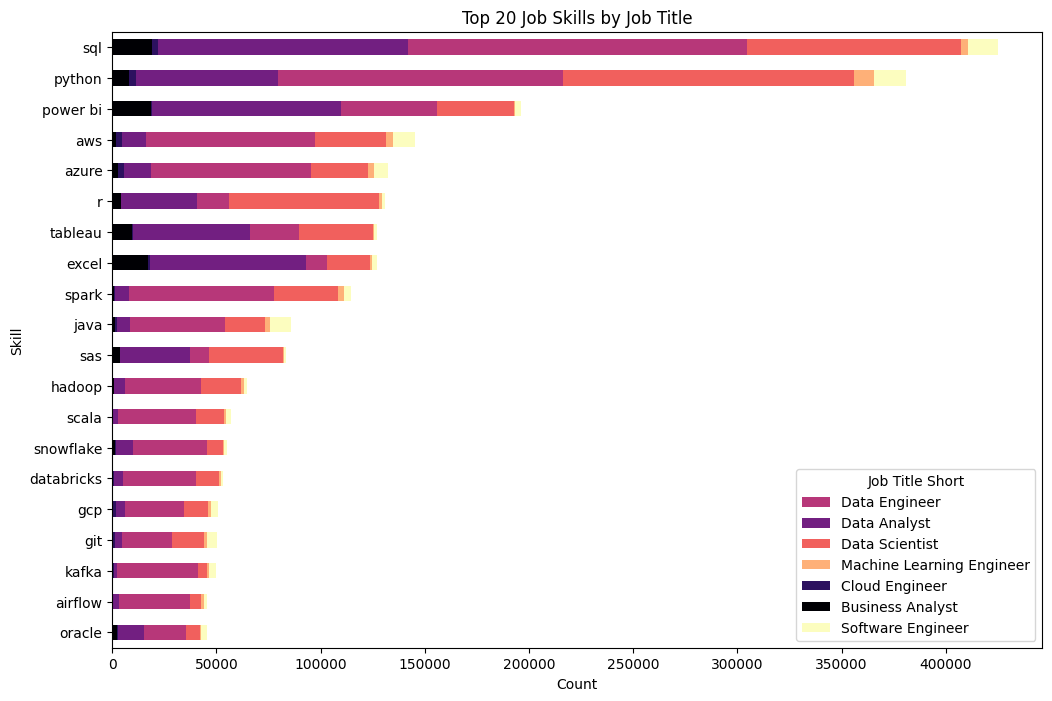

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `df` is your original DataFrame with 'job_skills' and 'job_title_short'

# Step 1: Expand skills and associate with job titles
skills_expanded = []

for _, row in df.dropna(subset=['job_skills']).iterrows():
    job_title = row['job_title_short']
    skills = row['job_skills'].replace('[', '').replace(']', '').replace('\'', '').replace(',', '').split()
    skills = [skill.lower() for skill in skills]
    skills = ['power bi' if skill in ['power', 'bi'] else skill for skill in skills]
    skills = [skill for skill in skills if skill not in ['not', 'specified']]
    for skill in skills:
        skills_expanded.append((skill, job_title))

# Step 2: Convert to DataFrame
skills_df = pd.DataFrame(skills_expanded, columns=['Skill', 'job_title_short'])

# Step 3: Count frequencies of each skill per job title
skills_counts = skills_df.groupby(['Skill', 'job_title_short']).size().unstack(fill_value=0)

# Step 4: Sort by total counts and take top 20 skills
top_skills_counts = skills_counts.sum(axis=1).sort_values(ascending=False).head(20)
top_skills_df = skills_counts.loc[top_skills_counts.index]

# Step 5: Define custom legend order
custom_order = [
    'Data Engineer',
    'Data Analyst',
    'Data Scientist',
    'Machine Learning Engineer',
    'Cloud Engineer',
    'Business Analyst',
    'Software Engineer'
]

# Plotting
ax = top_skills_df.plot(kind='barh', stacked=True, figsize=(12, 8), colormap='magma')

# Reverse the y-axis to show highest counts at the top
ax.invert_yaxis()

# Update legend to reflect the custom order
handles, labels = ax.get_legend_handles_labels()
legend_dict = dict(zip(labels, handles))
ordered_handles = [legend_dict[label] for label in custom_order if label in legend_dict]
plt.legend(handles=ordered_handles, labels=custom_order, title='Job Title Short')

plt.xlabel('Count')
plt.ylabel('Skill')
plt.title('Top 20 Job Skills by Job Title')
plt.show()


In [17]:
df.columns

Index(['job_title_short', 'job_title', 'job_location', 'job_via',
       'job_schedule_type', 'job_work_from_home', 'search_location',
       'job_posted_date', 'job_no_degree_mention', 'job_health_insurance',
       'job_country', 'salary_year_avg', 'company_name', 'job_skills',
       'job_type_skills', 'num_jobs', 'latitude', 'longitude'],
      dtype='object')

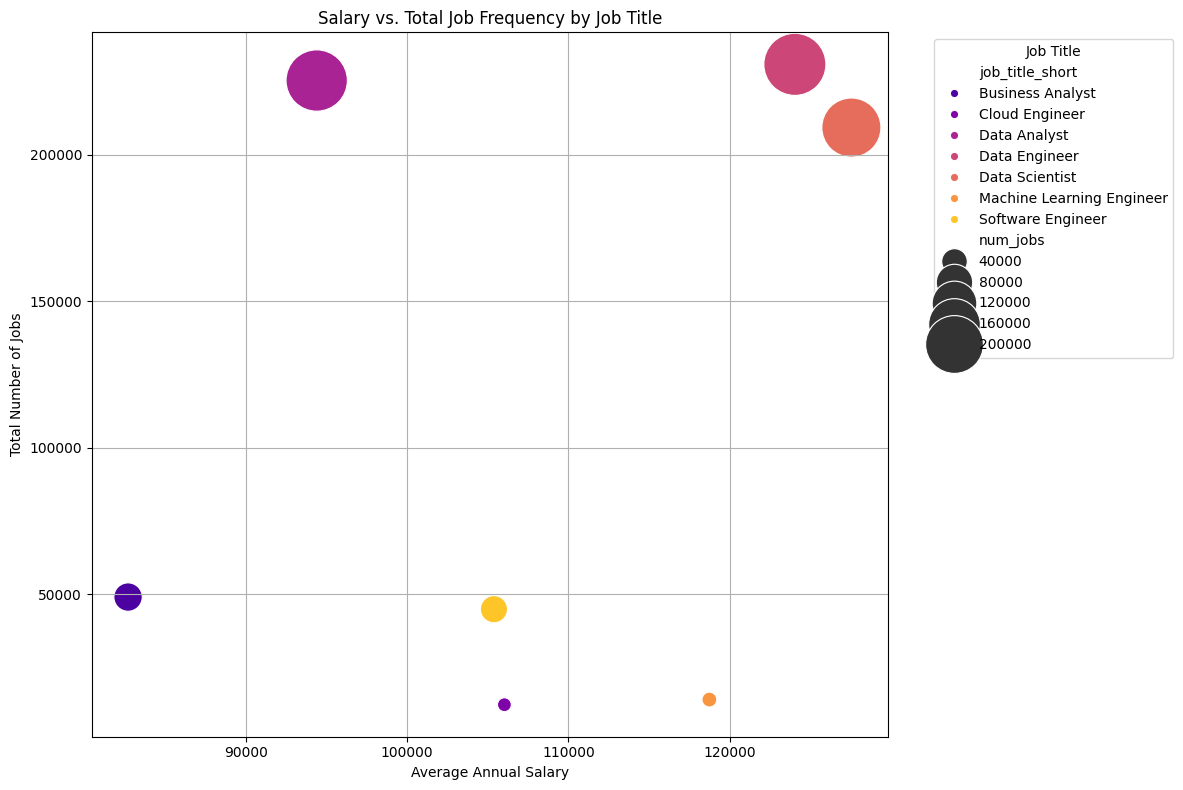

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (replace with your actual DataFrame)
# Group the data by 'job_title_short' and calculate the sum of 'num_jobs' and the mean of 'salary_year_avg'
grouped_df = df.groupby('job_title_short').agg({'num_jobs': 'sum', 'salary_year_avg': 'mean'}).reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(x='salary_year_avg', y='num_jobs', size='num_jobs', hue='job_title_short', data=grouped_df, palette='plasma', sizes=(100, 2000))

plt.xlabel('Average Annual Salary')
plt.ylabel('Total Number of Jobs')
plt.title('Salary vs. Total Job Frequency by Job Title')
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()


In [20]:
# Aggregate the number of jobs for each job title at each location
df_agg = df.groupby(['job_title_short', 'latitude', 'longitude']).agg({'num_jobs': 'sum'}).reset_index()


In [21]:
import folium

# Create a base map centered on the mean latitude and longitude
m = folium.Map(location=[df_agg['latitude'].mean(), df_agg['longitude'].mean()], zoom_start=4)

# Add markers to the map
for _, row in df_agg.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Job Title: {row['job_title_short']}<br>Total Jobs: {row['num_jobs']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Save the map to an HTML file
m.save('job_locations_with_job_counts.html')


In [38]:
df.columns

Index(['job_title_short', 'job_title', 'job_location', 'job_via',
       'job_schedule_type', 'job_work_from_home', 'search_location',
       'job_posted_date', 'job_no_degree_mention', 'job_health_insurance',
       'job_country', 'salary_year_avg', 'company_name', 'job_skills',
       'job_type_skills', 'num_jobs', 'latitude', 'longitude'],
      dtype='object')

MovieWriter imagemagick unavailable; using Pillow instead.


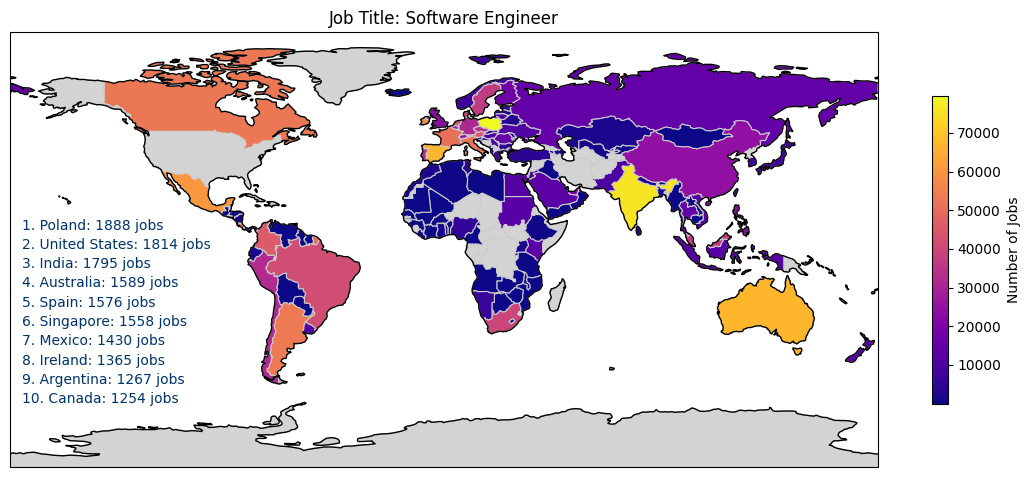

In [71]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cartopy.crs as ccrs

# Sample Data: Replace this with your actual DataFrame
# df should have 'job_country' and 'job_title_short' columns
df_aggregated_1 = df.groupby(['job_country', 'job_title_short']).size().reset_index(name='count')

# Load the world shapefile using Geopandas
world = gpd.read_file('EDA/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Create a figure and axis with Cartopy projection
fig, ax = plt.subplots(figsize=(14, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Define a colormap and normalization for the color bar
cmap = plt.get_cmap('plasma')
norm = plt.Normalize(vmin=df_aggregated_1['count'].min(), vmax=df_aggregated_1['count'].max())

# Create a color bar in advance, outside of the update function, to maintain its position
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Add a color bar on the right side
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.5, pad=0.05)
cbar.set_label('Number of Jobs')

# Define the function to update the plot
def update(frame):
    ax.clear()
    ax.set_title(f'Job Title: {job_titles[frame]}')

    # Get the data for the current job title
    frame_data = df_aggregated_1[df_aggregated_1['job_title_short'] == job_titles[frame]]
    
    # Merge job data with world map
    merged = world.merge(frame_data, how='left', left_on='NAME', right_on='job_country')

    # Plot the data using a color gradient to fill countries
    merged.plot(column='count', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', missing_kwds={'color': 'lightgrey'})
    
    # Add coastlines for reference
    ax.coastlines()

    # Display the top 10 countries on the left side with a fixed color
    top_10 = frame_data.nlargest(10, 'count')
    spacing = 8  # Adjust spacing between lines
    for i, (country, count) in enumerate(zip(top_10['job_country'], top_10['count'])):
        # Use a fixed color for the text
        color = '#003366'  # A bright blue color
        ax.text(-175, 10 - i * spacing, f'{i + 1}. {country}: {count} jobs', fontsize=10, ha='left', va='center', color=color)

# Create an animation
job_titles = df_aggregated_1['job_title_short'].unique()
ani = animation.FuncAnimation(fig, update, frames=len(job_titles), repeat=False)

# Save the animation as a GIF
ani.save('job_titles_animation.gif', writer='imagemagick', fps=1)

# Display the animation (in a notebook)
plt.show()
